##### Обов'язкові кроки:
- первинний аналіз даних (відстуність пропусків, наявність категоріальних фіч, ...)
- фича інжиніринг (побудувати  1-2 нові фічі)
- масштабування фіч
- поділ датасету на тренувальну, валідаційну та тестову частини
- тренування базової моделі із дефолтними гіперпараметрами
- підбір гіперпараметрів
- оцінка результатів

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
wine_quality_df = pd.DataFrame()
for wine_type in ("red", "white"):
    df = pd.read_csv(f"../datasets/wine_quality/winequality-{wine_type}.csv", delimiter=";")
    df["wine_type"] = 0 if wine_type == "red" else 1
    wine_quality_df = pd.concat([wine_quality_df, df])

In [121]:
wine_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


No null-s, no categorical features

In [122]:
wine_quality_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


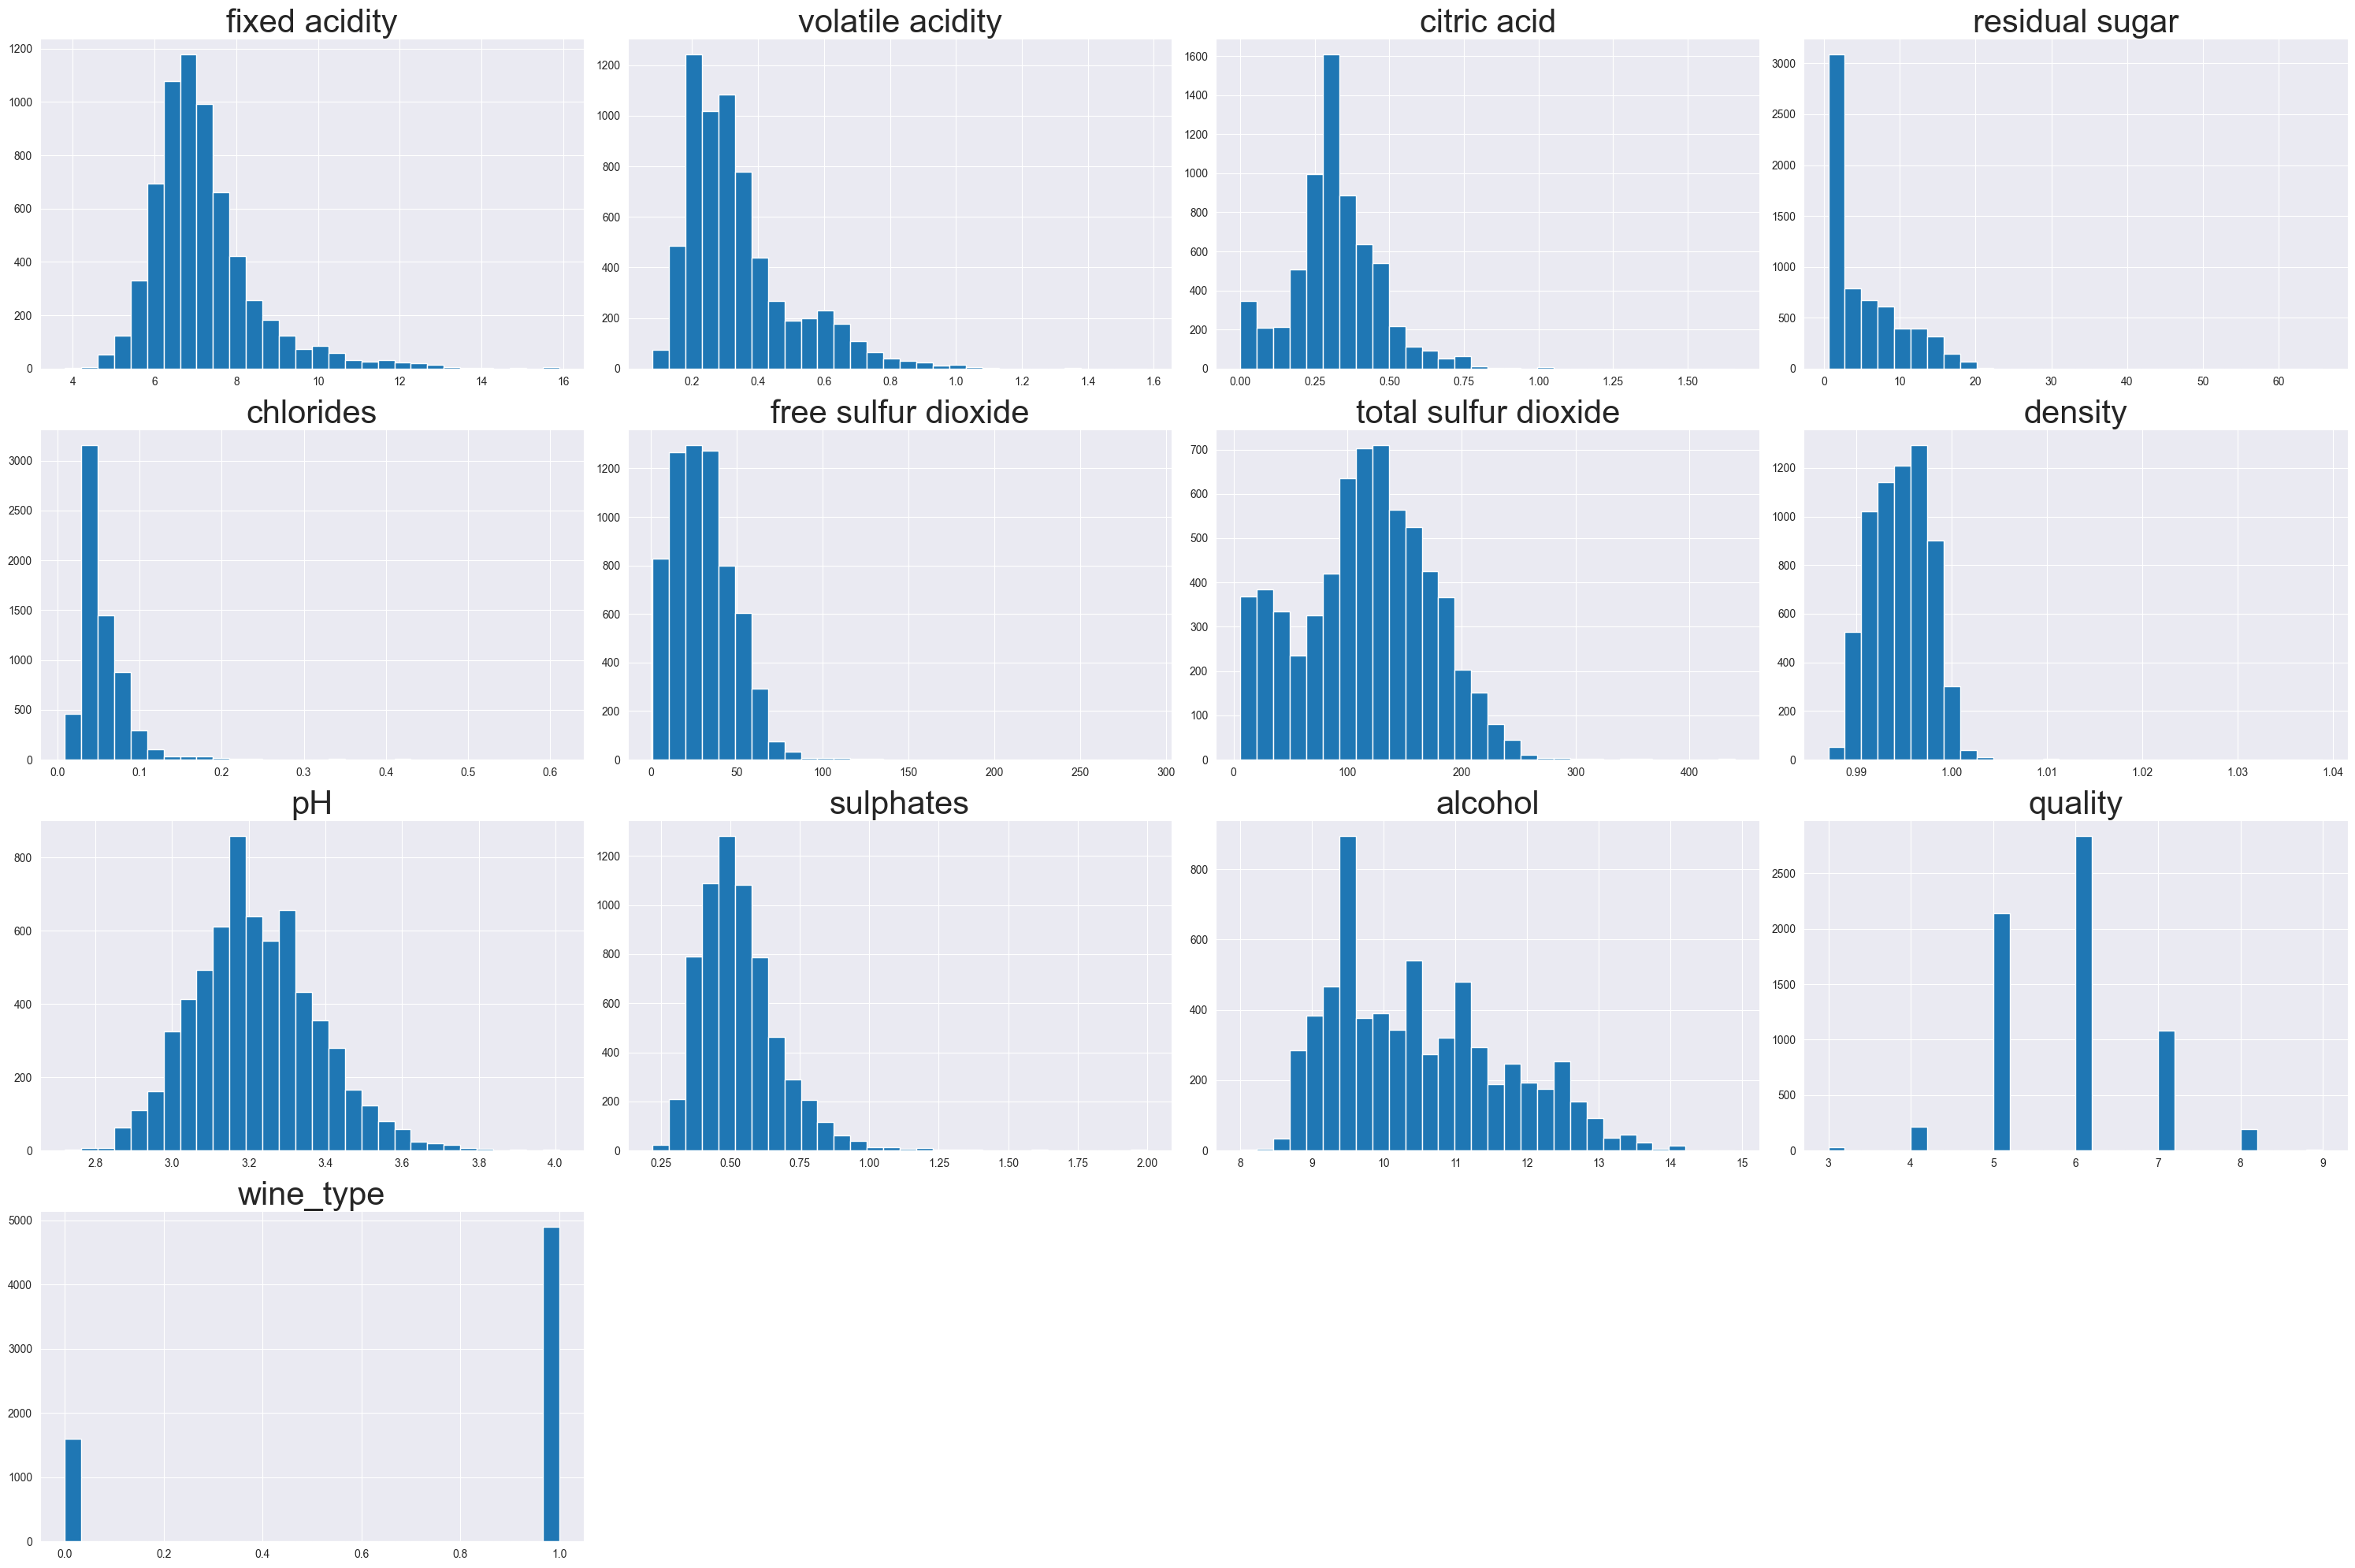

In [123]:
# Set the title size globally
plt.rc("axes", titlesize=30)  # Set fontsize of the figure title

wine_quality_df.hist(bins=30, figsize=(30, 20))
plt.tight_layout()  # This will help to arrange the plots without overlapping
plt.show()

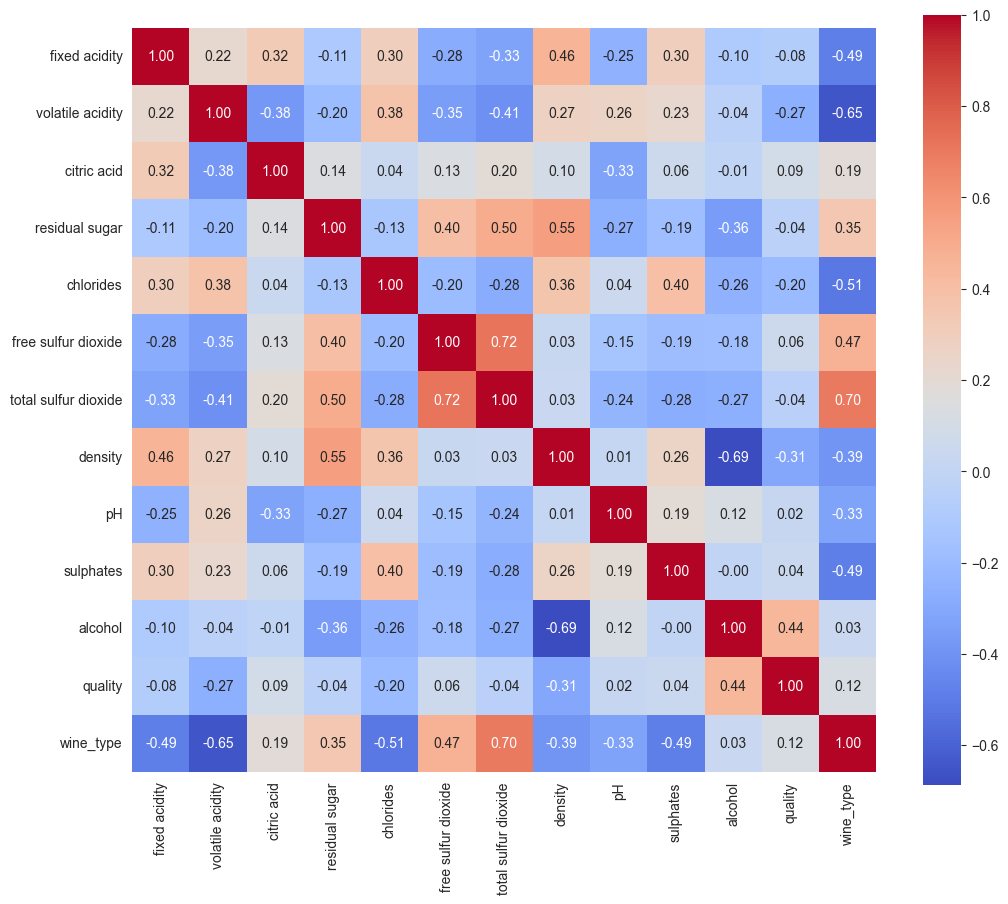

In [124]:
# Compute the correlation matrix
corr = wine_quality_df.corr()

# Draw the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.show()

No correlating features

### Training on mixed White + Red wines data

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


for label, df in (
    ("General", wine_quality_df),
    ("Red", wine_quality_df[wine_quality_df["wine_type"] == 0]),
    ("White", wine_quality_df[wine_quality_df["wine_type"] == 1]),
):
    X, y = df.drop("quality", axis=1), df["quality"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    print(f"Results for {label} dataset:")
    # Selection of hyperparameters
    for fit_intercept in (True, False):
        model = LinearRegression(fit_intercept=fit_intercept)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"  fit_intercept={fit_intercept}")
        print(f"    Mean Squared Error: {mse}")
        print(f"    R^2 Score: {r2}")
    print()

Results for General dataset:
  fit_intercept=True
    Mean Squared Error: 0.5412384543695591
    R^2 Score: 0.2671574851262717
  fit_intercept=False
    Mean Squared Error: 34.62841973472972
    R^2 Score: -45.88724165776804

Results for Red dataset:
  fit_intercept=True
    Mean Squared Error: 0.3900251439639551
    R^2 Score: 0.40318034127962166
  fit_intercept=False
    Mean Squared Error: 32.389382530472275
    R^2 Score: -48.562497513716

Results for White dataset:
  fit_intercept=True
    Mean Squared Error: 0.5690247717229254
    R^2 Score: 0.2652750042179155
  fit_intercept=False
    Mean Squared Error: 35.16984338080354
    R^2 Score: -44.4113147857819

